In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
plt.style.use('ggplot')
sns.set_palette("Set2")

### REAL ESTATE INVESTMENT ADVISOR - EDA

In [6]:
df = pd.read_csv('india_housing_prices.csv')

In [7]:
df.shape

(250000, 23)

In [8]:
df.head(3)

,ID,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,...,Age_of_Property,Nearby_Schools,Nearby_Hospitals,Public_Transport_Accessibility,Parking_Space,Security,Amenities,Facing,Owner_Type,Availability_Status
0,1,Tamil Nadu,Chennai,Locality_84,Apartment,1,4740,489.76,0.10,1990,...,35,10,3,High,No,No,"Playground, Gym, Garden, Pool, Clubhouse",West,Owner,Ready_to_Move
1,2,Maharashtra,Pune,Locality_490,Independent House,3,2364,195.52,0.08,2008,...,17,8,1,Low,No,Yes,"Playground, Clubhouse, Pool, Gym, Garden",North,Builder,Under_Construction
2,3,Punjab,Ludhiana,Locality_167,Apartment,2,3642,183.79,0.05,1997,...,28,9,8,Low,Yes,No,"Clubhouse, Pool, Playground, Gym",South,Broker,Ready_to_Move


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 23 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              250000 non-null  int64  
 1   State                           250000 non-null  object 
 2   City                            250000 non-null  object 
 3   Locality                        250000 non-null  object 
 4   Property_Type                   250000 non-null  object 
 5   BHK                             250000 non-null  int64  
 6   Size_in_SqFt                    250000 non-null  int64  
 7   Price_in_Lakhs                  250000 non-null  float64
 8   Price_per_SqFt                  250000 non-null  float64
 9   Year_Built                      250000 non-null  int64  
 10  Furnished_Status                250000 non-null  object 
 11  Floor_No                        250000 non-null  int64  
 12  Total_Floors    

In [10]:
df.isnull().sum()

ID                                0
State                             0
City                              0
Locality                          0
Property_Type                     0
BHK                               0
Size_in_SqFt                      0
Price_in_Lakhs                    0
Price_per_SqFt                    0
Year_Built                        0
Furnished_Status                  0
Floor_No                          0
Total_Floors                      0
Age_of_Property                   0
Nearby_Schools                    0
Nearby_Hospitals                  0
Public_Transport_Accessibility    0
Parking_Space                     0
Security                          0
Amenities                         0
Facing                            0
Owner_Type                        0
Availability_Status               0
dtype: int64

In [11]:
# Price per sq ft in rupees
df['Price_per_SqFt'] = (df['Price_in_Lakhs'] * 100000) / df['Size_in_SqFt']

In [12]:
df['Age_of_Property'] = 2025 - df['Year_Built']

In [13]:
# Create Infrastructure column
df['Infrastructure_Score'] = df['Nearby_Schools'] + df['Nearby_Hospitals']

### Q1: Property Price Distribution

Text(0.5, 1.0, 'Price Distribution')

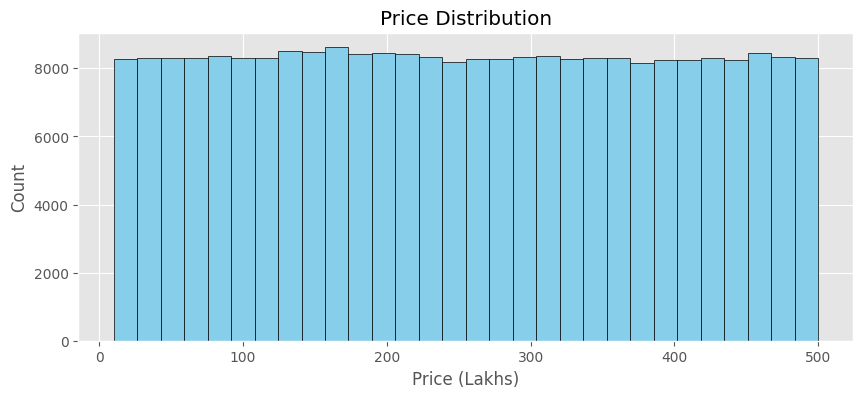

In [14]:
plt.figure(figsize=(10, 4))

plt.hist(df['Price_in_Lakhs'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Price (Lakhs)')
plt.ylabel('Count')
plt.title('Price Distribution')

### Q2: Distribution of Property Sizes

Text(0.5, 1.0, 'Size Distribution')

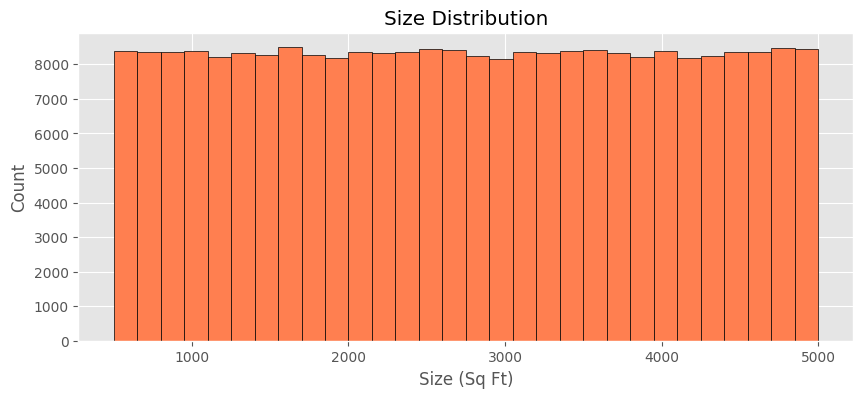

In [15]:
plt.figure(figsize=(10, 4))

plt.hist(df['Size_in_SqFt'], bins=30, color='coral', edgecolor='black')
plt.xlabel('Size (Sq Ft)')
plt.ylabel('Count')
plt.title('Size Distribution')

### Q3: Price by Property Type

In [16]:
df['Property_Type'].unique()

array(['Apartment', 'Independent House', 'Villa'], dtype=object)

In [17]:
price_by_type = df.groupby('Property_Type')['Price_per_SqFt'].mean().sort_values(ascending=False)

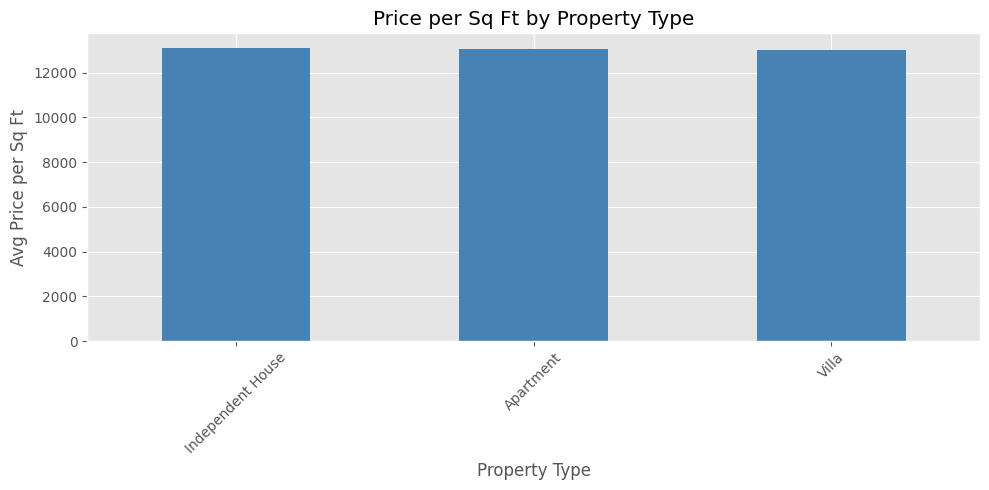

Property_Type
Independent House    13102.047140
Apartment            13047.320951
Villa                13025.606137
Name: Price_per_SqFt, dtype: float64


In [18]:
plt.figure(figsize=(10, 5))
price_by_type.plot(kind='bar', color='steelblue')
plt.xlabel('Property Type')
plt.ylabel('Avg Price per Sq Ft')
plt.title('Price per Sq Ft by Property Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(price_by_type)

### Q4: Property Size vs Price

In [19]:
sample = df.sample(min(500, len(df)))  # Use sample for faster plotting

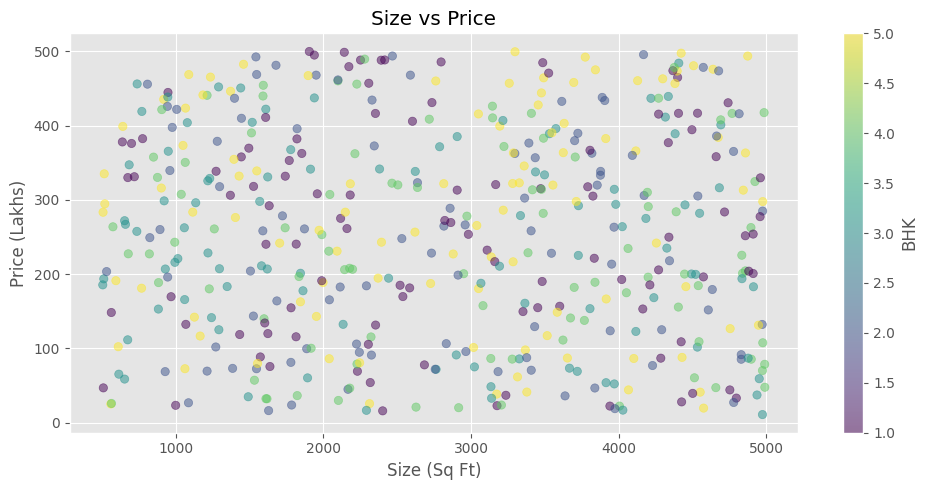

Correlation: -0.003


In [20]:
plt.figure(figsize=(10, 5))
plt.scatter(sample['Size_in_SqFt'], sample['Price_in_Lakhs'], 
           alpha=0.5, c=sample['BHK'], cmap='viridis')
plt.xlabel('Size (Sq Ft)')
plt.ylabel('Price (Lakhs)')
plt.title('Size vs Price')
plt.colorbar(label='BHK')
plt.tight_layout()
plt.show()

correlation = df['Size_in_SqFt'].corr(df['Price_in_Lakhs'])
print(f"Correlation: {correlation:.3f}")

### Q5: Price per Sq Ft Outliers

In [21]:
Q1 = df['Price_per_SqFt'].quantile(0.25)
Q3 = df['Price_per_SqFt'].quantile(0.75)
IQR = Q3 - Q1
outliers = len(df[(df['Price_per_SqFt'] < Q1 - 1.5*IQR) | (df['Price_per_SqFt'] > Q3 + 1.5*IQR)])
print(f"Outliers: {outliers} ({outliers/len(df)*100:.2f}%)")

Outliers: 19723 (7.89%)


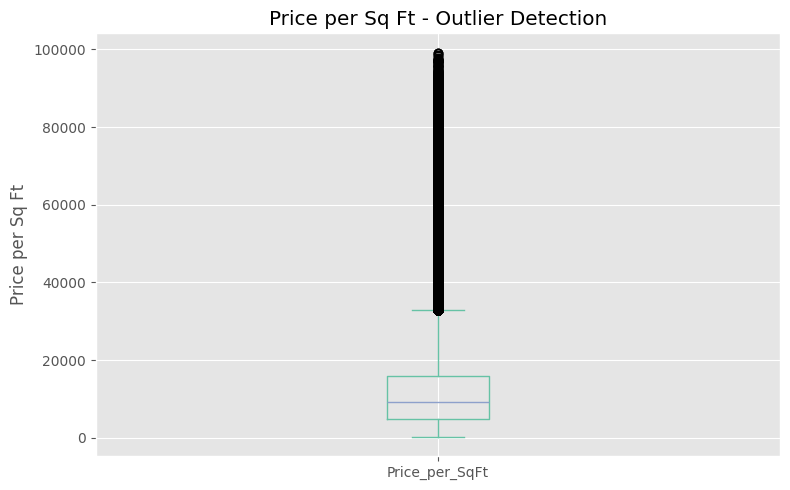

In [22]:
plt.figure(figsize=(8, 5))
df['Price_per_SqFt'].plot(kind='box', vert=True)
plt.ylabel('Price per Sq Ft')
plt.title('Price per Sq Ft - Outlier Detection')
plt.tight_layout()
plt.show()

### Q9: BHK Distribution

In [23]:
bhk_count = df['BHK'].value_counts().sort_index()
bhk_count

BHK
1    50196
2    49815
3    50067
4    49788
5    50134
Name: count, dtype: int64

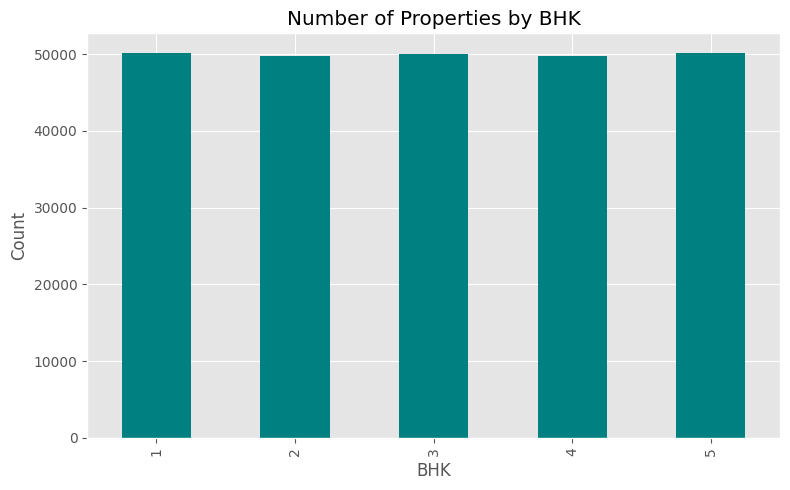

In [24]:
plt.figure(figsize=(8, 5))
bhk_count.plot(kind='bar', color='teal')
plt.xlabel('BHK')
plt.ylabel('Count')
plt.title('Number of Properties by BHK')

plt.tight_layout()
plt.show()

In [25]:
# 5. LOCATION ANALYSIS (Q6, Q7, Q8)
# ============================================================================

print("\n" + "=" * 60)
print("📍 LOCATION ANALYSIS")
print("=" * 60)


📍 LOCATION ANALYSIS


### Q6: Top 10 States

In [26]:
state_price = df.groupby('State')['Price_per_SqFt'].mean().sort_values(ascending=False).head(10)
state_price

State
Karnataka         13252.204917
Andhra Pradesh    13201.578864
Uttar Pradesh     13142.519674
Tamil Nadu        13132.420881
Telangana         13093.098906
Gujarat           13091.146124
Assam             13084.021592
Maharashtra       13070.133821
Madhya Pradesh    13069.029240
Haryana           13068.740834
Name: Price_per_SqFt, dtype: float64

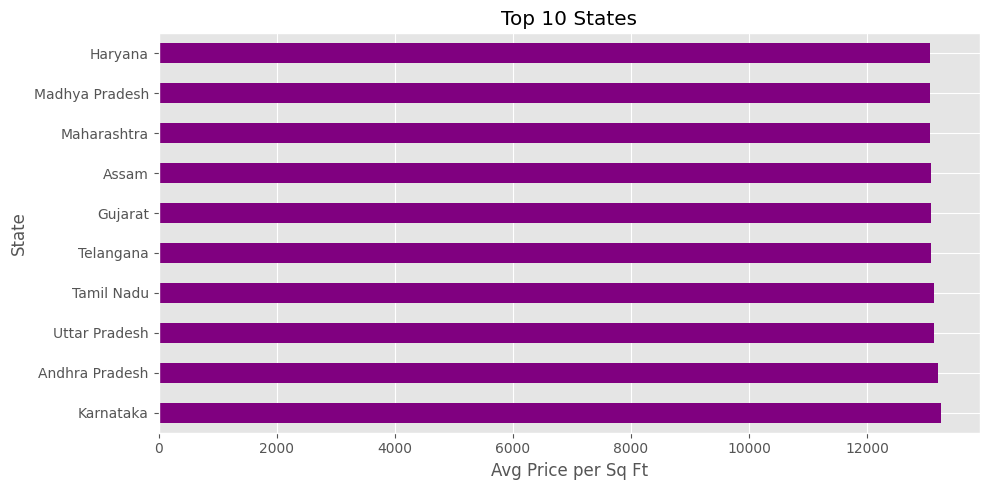

In [27]:
plt.figure(figsize=(10, 5))
state_price.plot(kind='barh', color='purple')
plt.xlabel('Avg Price per Sq Ft')
plt.ylabel('State')
plt.title('Top 10 States')

plt.tight_layout()
plt.show()

### Q7: Top 10 Cities

In [28]:
city_price = df.groupby('City')['Price_in_Lakhs'].mean().sort_values(ascending=False).head(10)
city_price

City
Bangalore     258.456639
Surat         258.080467
Kochi         257.415221
Gaya          257.053391
Mangalore     256.920925
Dehradun      256.890115
Mysore        256.848172
Chennai       256.830172
Hyderabad     256.594051
Coimbatore    256.504745
Name: Price_in_Lakhs, dtype: float64

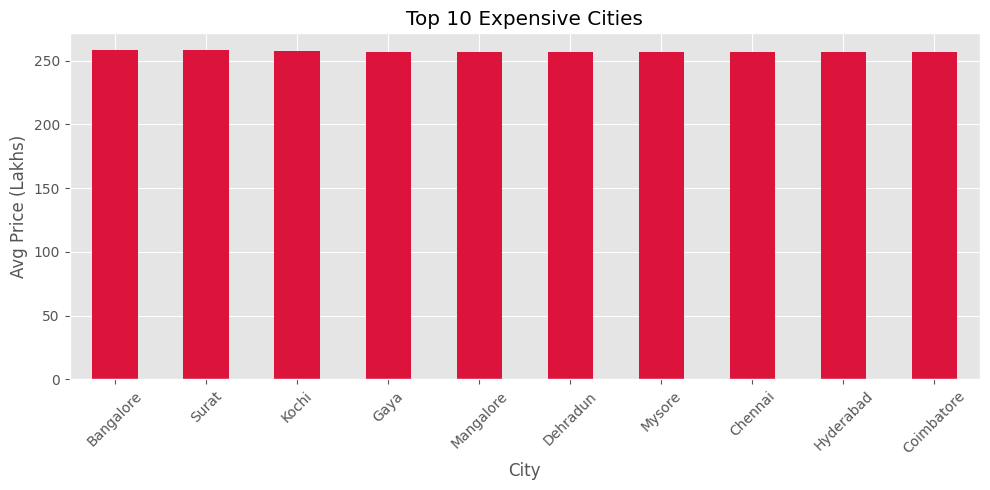

In [29]:
plt.figure(figsize=(10, 5))
city_price.plot(kind='bar', color='crimson')
plt.xlabel('City')
plt.ylabel('Avg Price (Lakhs)')
plt.title('Top 10 Expensive Cities')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


### Q8: Top 10 Oldest Localities

In [30]:
locality_age = df.groupby('Locality')['Age_of_Property'].median().sort_values(ascending=False).head(10)
locality_age

Locality
Locality_72     21.0
Locality_403    21.0
Locality_90     20.0
Locality_491    20.0
Locality_99     20.0
Locality_1      20.0
Locality_167    20.0
Locality_51     20.0
Locality_407    20.0
Locality_413    20.0
Name: Age_of_Property, dtype: float64

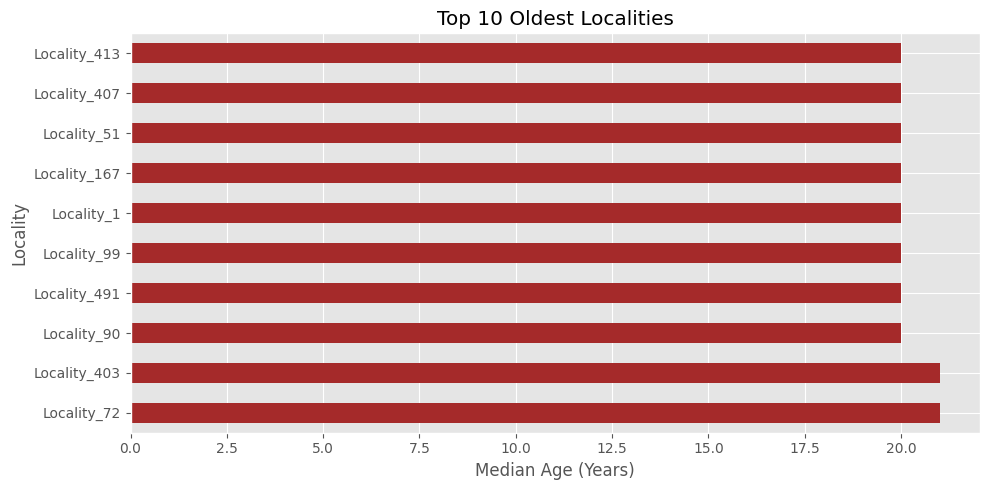

In [31]:
plt.figure(figsize=(10, 5))
locality_age.plot(kind='barh', color='brown')
plt.xlabel('Median Age (Years)')
plt.ylabel('Locality')
plt.title('Top 10 Oldest Localities')

plt.tight_layout()
plt.show()

### Q11: Correlation Matrix

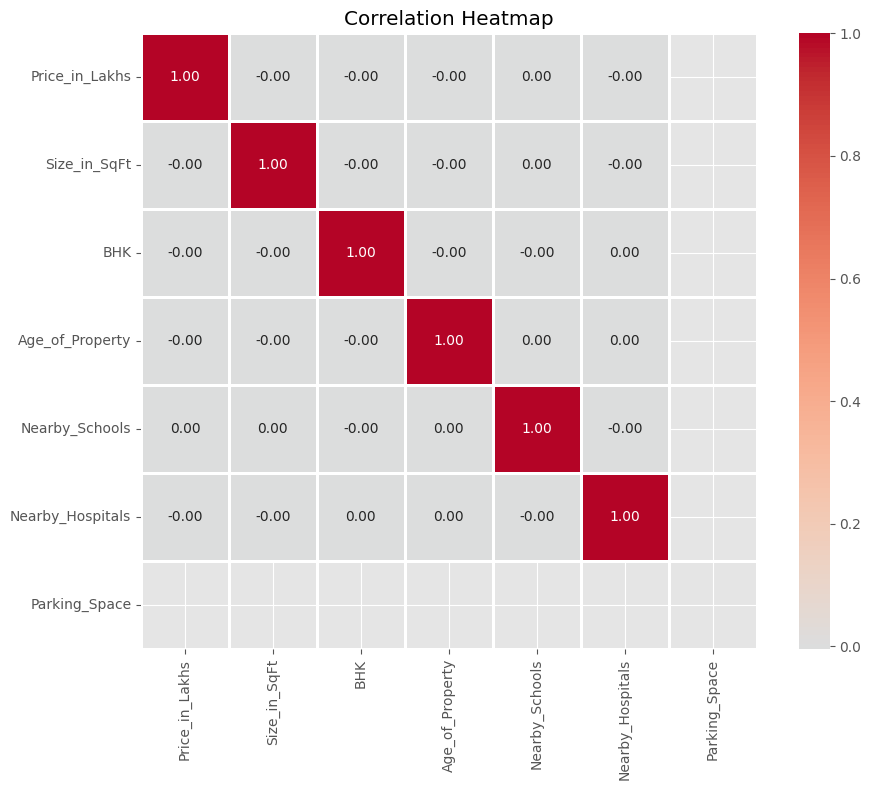

In [32]:
# Select only truly numeric columns
numeric_cols = ['Price_in_Lakhs', 'Size_in_SqFt', 'BHK', 'Age_of_Property', 
                'Nearby_Schools', 'Nearby_Hospitals', 'Parking_Space']

available_numeric_cols = []
for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
        available_numeric_cols.append(col)

# Create correlation matrix with available numeric columns
corr_matrix = df[available_numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

### Q12: Schools vs Price

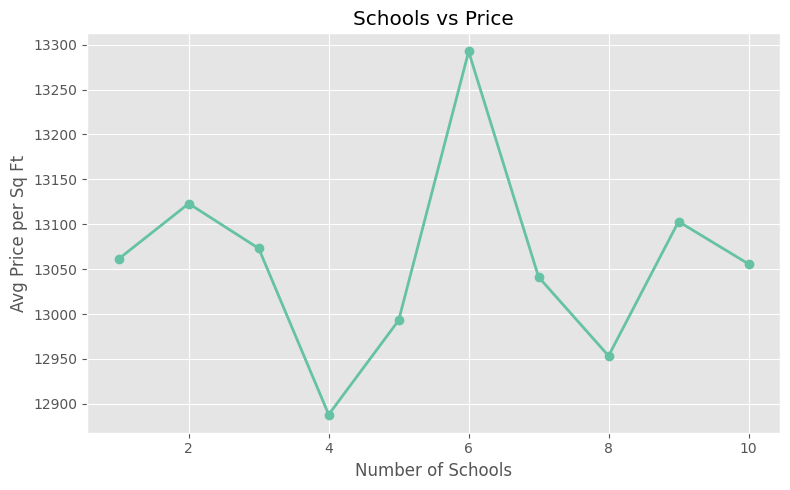

In [33]:
school_price = df.groupby('Nearby_Schools')['Price_per_SqFt'].mean()

plt.figure(figsize=(8, 5))
plt.plot(school_price.index, school_price.values, marker='o', linewidth=2)
plt.xlabel('Number of Schools')
plt.ylabel('Avg Price per Sq Ft')
plt.title('Schools vs Price')
plt.grid(True)
plt.tight_layout()
plt.show()

### Q13: Hospitals vs Price

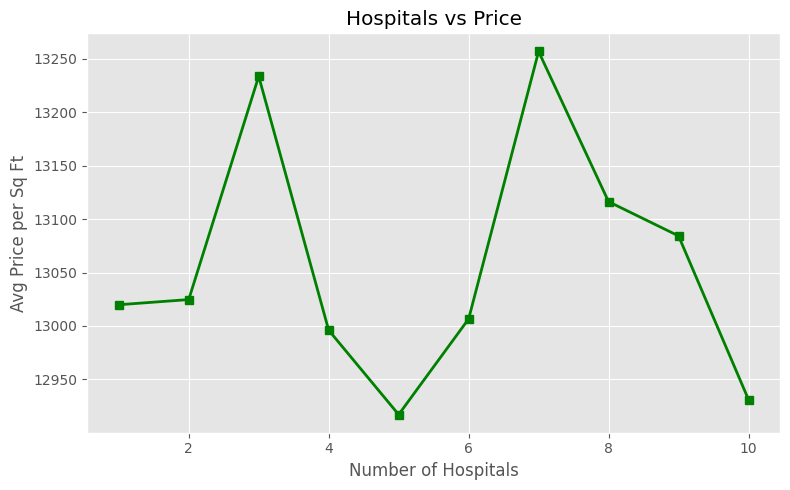

In [34]:
hospital_price = df.groupby('Nearby_Hospitals')['Price_per_SqFt'].mean()

plt.figure(figsize=(8, 5))
plt.plot(hospital_price.index, hospital_price.values, marker='s', 
         linewidth=2, color='green')
plt.xlabel('Number of Hospitals')
plt.ylabel('Avg Price per Sq Ft')
plt.title('Hospitals vs Price')
plt.grid(True)
plt.tight_layout()
plt.show()

### Q14: Furnished Status vs Price

In [35]:
furnished_price = df.groupby('Furnished_Status')['Price_in_Lakhs'].mean().sort_values(ascending=False)
print(furnished_price)

Furnished_Status
Unfurnished       254.979752
Furnished         254.445550
Semi-furnished    254.334836
Name: Price_in_Lakhs, dtype: float64


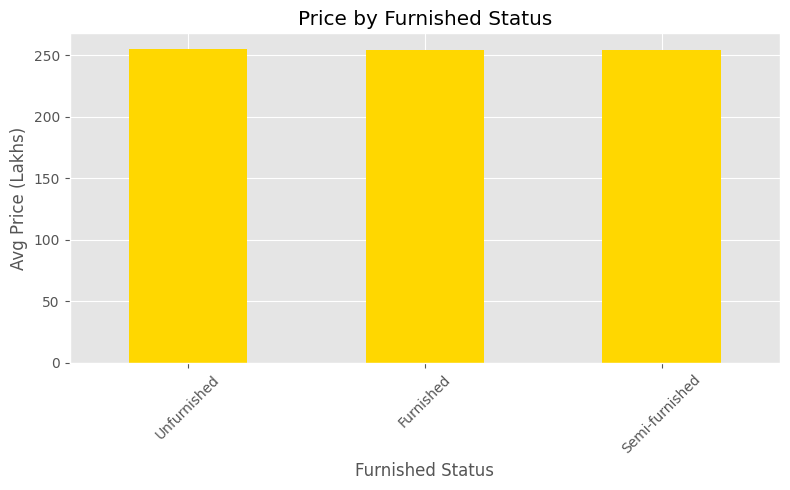

In [36]:
plt.figure(figsize=(8, 5))
furnished_price.plot(kind='bar', color='gold')
plt.xlabel('Furnished Status')
plt.ylabel('Avg Price (Lakhs)')
plt.title('Price by Furnished Status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Q15: Facing Direction vs Price

In [37]:
facing_price = df.groupby('Facing')['Price_per_SqFt'].mean().sort_values(ascending=False)
print(facing_price)

Facing
West     13140.023069
South    13044.110407
North    13024.865062
East     13023.700925
Name: Price_per_SqFt, dtype: float64


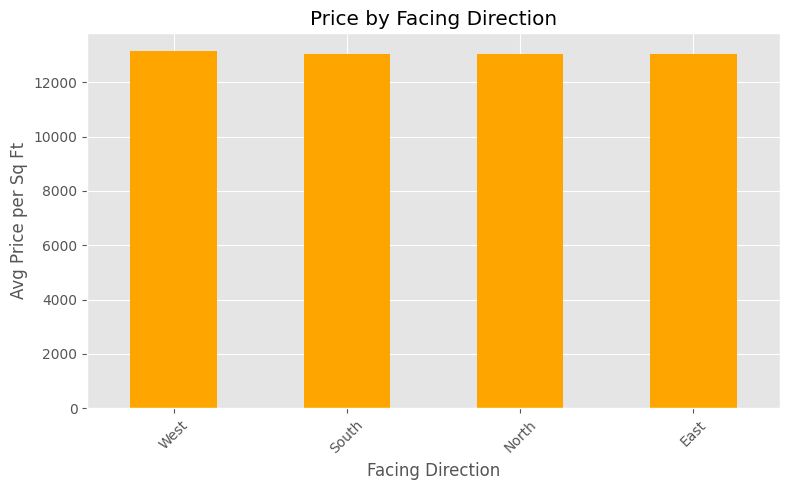

In [38]:
plt.figure(figsize=(8, 5))
facing_price.plot(kind='bar', color='orange')
plt.xlabel('Facing Direction')
plt.ylabel('Avg Price per Sq Ft')
plt.title('Price by Facing Direction')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Q16: Owner Type

In [39]:
owner_counts = df['Owner_Type'].value_counts()
print(owner_counts)

Owner_Type
Broker     83479
Owner      83268
Builder    83253
Name: count, dtype: int64


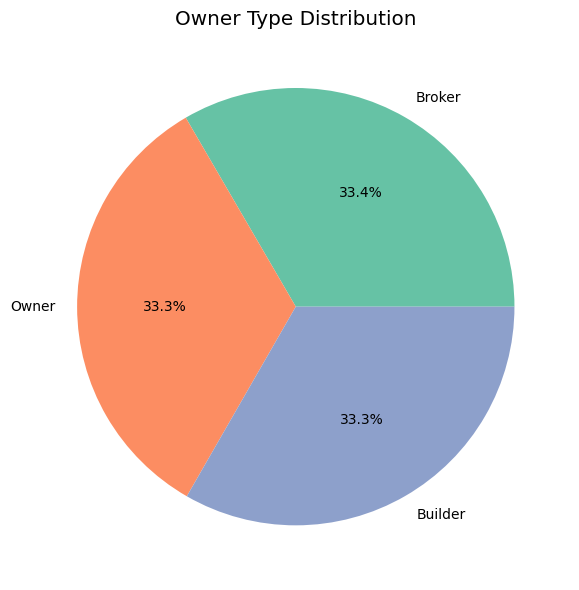

In [40]:
plt.figure(figsize=(8, 6))
plt.pie(owner_counts.values, labels=owner_counts.index, autopct='%1.1f%%')
plt.title('Owner Type Distribution')
plt.tight_layout()
plt.show()

### Q17: Availability Status

In [41]:
avail_counts = df['Availability_Status'].value_counts()
print(avail_counts)

Availability_Status
Under_Construction    125035
Ready_to_Move         124965
Name: count, dtype: int64


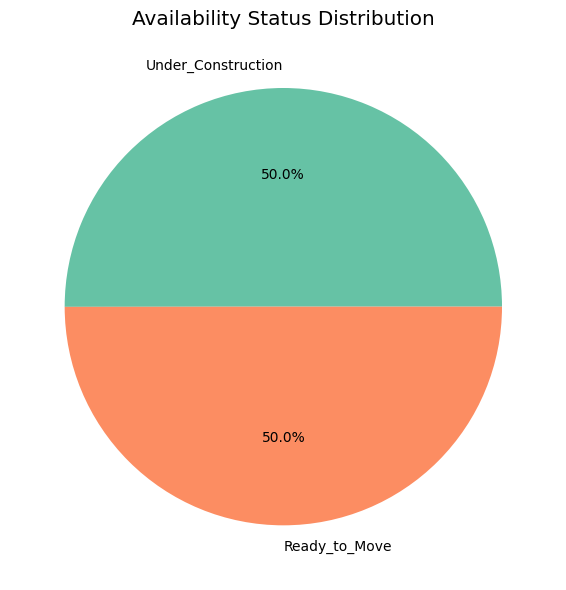

In [42]:
plt.figure(figsize=(8, 6))
plt.pie(avail_counts.values, labels=avail_counts.index, autopct='%1.1f%%')
plt.title('Availability Status Distribution')
plt.tight_layout()
plt.show()

### Q19: Top 10 Amenities

In [43]:
amenities_price = df.groupby('Amenities')['Price_per_SqFt'].mean().sort_values(ascending=False).head(10)
print(amenities_price)

Amenities
Clubhouse, Pool, Garden, Playground         15047.658995
Pool, Gym, Clubhouse, Playground, Garden    14673.620345
Garden, Clubhouse, Pool, Gym, Playground    14647.737734
Playground, Gym, Clubhouse, Garden          14433.176608
Clubhouse, Playground, Garden, Pool, Gym    14375.737396
Garden, Playground, Pool                    14340.138560
Gym, Clubhouse, Pool, Garden, Playground    14231.046553
Clubhouse, Gym, Pool, Garden, Playground    14205.938903
Gym, Clubhouse, Garden, Playground, Pool    14153.782321
Playground, Clubhouse, Garden, Pool, Gym    14119.846987
Name: Price_per_SqFt, dtype: float64


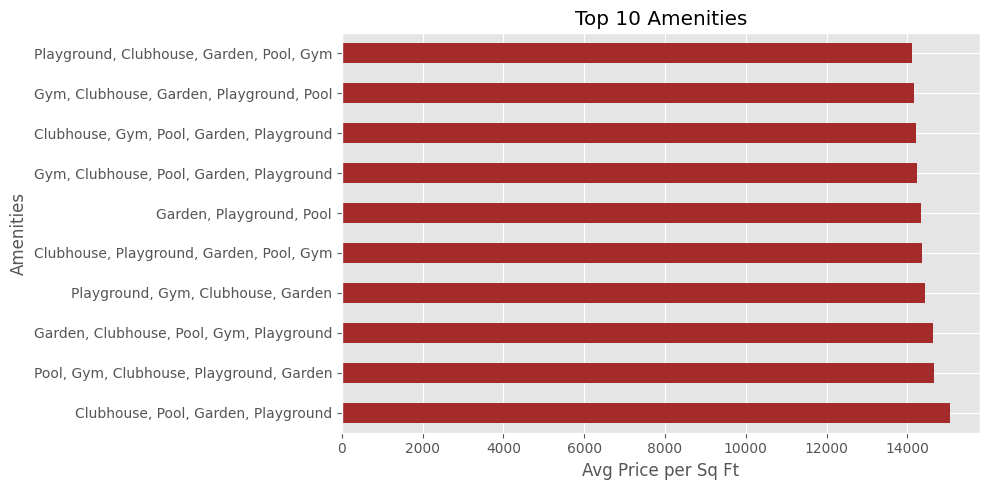

In [44]:
plt.figure(figsize=(10, 5))
amenities_price.plot(kind='barh', color='brown')
plt.xlabel('Avg Price per Sq Ft')
plt.ylabel('Amenities')
plt.title('Top 10 Amenities')
plt.tight_layout()
plt.show()

### Q20: Transport vs Price

In [45]:
transport_price = df.groupby('Public_Transport_Accessibility')['Price_per_SqFt'].mean().sort_values(ascending=False)
print(transport_price)

Public_Transport_Accessibility
Low       13085.539062
Medium    13062.233115
High      13027.242169
Name: Price_per_SqFt, dtype: float64


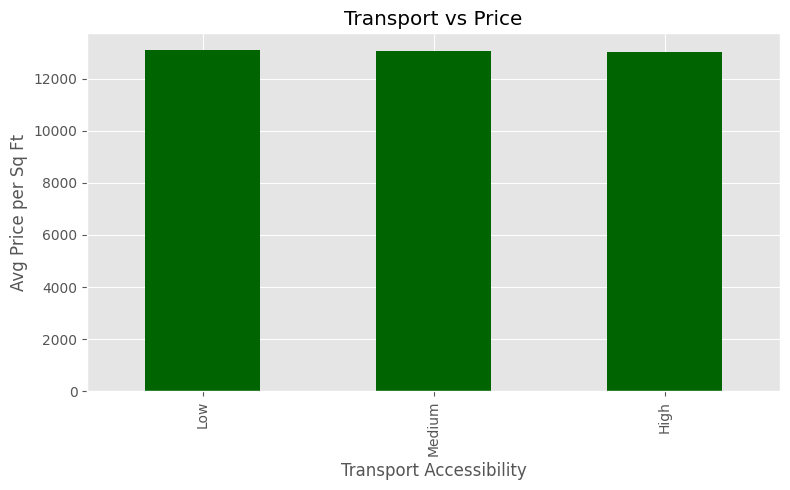

In [46]:
plt.figure(figsize=(8, 5))
transport_price.plot(kind='bar', color='darkgreen')
plt.xlabel('Transport Accessibility')
plt.ylabel('Avg Price per Sq Ft')
plt.title('Transport vs Price')
plt.tight_layout()
plt.show()

In [47]:
# 9. SAVE PROCESSED DATA
df.to_csv('processed_housing_data.csv', index=False)

### EDA Summary

In [50]:
print(f"\n📊 Total Properties Analyzed: {len(df):,}")
print(f"📍 Total Cities: {df['City'].nunique()}")
print(f"🏘️ Total States: {df['State'].nunique()}")
print(f"💰 Price Range: ₹{df['Price_in_Lakhs'].min():.1f}L - ₹{df['Price_in_Lakhs'].max():.1f}L")
print(f"📏 Size Range: {df['Size_in_SqFt'].min():.0f} - {df['Size_in_SqFt'].max():.0f} Sq Ft")

print("\n✅ All visualizations and analysis completed!")
print("✅ Ready for Streamlit deployment!")


📊 Total Properties Analyzed: 250,000
📍 Total Cities: 42
🏘️ Total States: 20
💰 Price Range: ₹10.0L - ₹500.0L
📏 Size Range: 500 - 5000 Sq Ft

✅ All visualizations and analysis completed!
✅ Ready for Streamlit deployment!
